In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score,KFold
from imblearn.over_sampling import RandomOverSampler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier

In [144]:
df = pd.read_csv(r"D:\Desktop\Dataset\BRCA Data.csv")
df.head(3)

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    float64
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

In [146]:
df.isnull().sum()

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

In [147]:
df.dropna(inplace=True)

In [148]:
for i in df.iloc[:,2:]:
    status = df[i].value_counts()
    fig = px.pie(values= status.values, names= status.index, hole= 0.5,title= i, width= 700,height= 400)
    fig.show()
    

In [149]:
df.drop(['Patient_ID','ER status', 'PR status', 'Date_of_Surgery', 'Date_of_Last_Visit'],axis=1,inplace= True)
df.head(3)

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,Dead
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,Alive


In [150]:
ran = RandomOverSampler()
X,Y = ran.fit_resample(df.iloc[:,:-1],df['Patient_Status'])

In [151]:
X.shape

(510, 10)

In [152]:
status = Y.value_counts()
fig = px.pie(values= status.values, names= status.index, hole= 0.5,title= i, width= 700,height= 400)
fig.show()
print(Y.value_counts())

Patient_Status
Alive    255
Dead     255
Name: count, dtype: int64


In [153]:
df.isnull().sum()

Age               0
Gender            0
Protein1          0
Protein2          0
Protein3          0
Protein4          0
Tumour_Stage      0
Histology         0
HER2 status       0
Surgery_type      0
Patient_Status    0
dtype: int64

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [155]:
# trf1 = ColumnTransformer([('ohe', OneHotEncoder(drop='first',handle_unknown='ignore'),[1,7,8,9]),
#                           ('ord',OneHotEncoder(categories=[['I','II','III']]),[6])],remainder='passthrough')
# trf2 = ColumnTransformer([('scaling',StandardScaler(),[0,2,3,4,5,6])],remainder='passthrough')
# trf3 = DecisionTreeClassifier(criterion='entropy',max_depth = 18, splitter = 'best')

In [156]:
lab = LabelEncoder()
y_train_enc = lab.fit_transform(y_train)
y_test_enc = lab.transform(y_test)

In [157]:
lab.classes_

array(['Alive', 'Dead'], dtype=object)

# hlw

In [158]:
# pipe = Pipeline([
#     ('trf1',trf1),
#     ('trf2',trf2),
#     ('trf3',trf3)
# ])

In [159]:
preprocessor_tree = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'), [1,7,8,9]),
        ('ord', OneHotEncoder(categories=[['I','II','III']], handle_unknown='ignore'), [6])
    ],
    remainder='passthrough'
)

preprocessor_normal = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'), [1,7,8,9]),
        ('ord', OneHotEncoder(categories=[['I','II','III']], handle_unknown='ignore'), [6]),
        ('scaler', StandardScaler(), [0,2,3,4,5]) 
    ],
    remainder='passthrough'
)

dt_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor_tree),
    ('model', DecisionTreeClassifier(
        criterion='entropy',
        max_depth=18,splitter='best'
    ))
])

from sklearn.ensemble import ExtraTreesClassifier
extra_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor_tree),
    ('model', ExtraTreesClassifier(
        criterion = 'entropy',max_depth = 16,max_features = 'sqrt'
    ))
])

from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor_tree),
    ('model', RandomForestClassifier())
])

from sklearn.svm import SVC

svm_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor_normal),
    ('model', SVC(C=1,kernel='rbf',gamma=1))
])

from sklearn.neighbors import KNeighborsClassifier

knf_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor_normal),
    ('model', KNeighborsClassifier(metric= 'manhattan',n_neighbors= 3, weights= 'distance'))
])
import xgboost as xgb

xgb_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor_normal),
    ('model',xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42,colsample_bytree = 0.7,learning_rate = 0.1,max_depth = 5,
                        n_estimators = 200,subsample = 0.7))
])
models = {
    'Decision Tree': dt_pipeline,
    'ExtraClassifier': extra_pipeline,
    'Random Forest': rf_pipeline,
    'SVM': svm_pipeline,
    'KNF': knf_pipeline,
    'XGBoost':xgb_pipeline
}


In [160]:
models

{'Decision Tree': Pipeline(steps=[('preprocessing',
                  ColumnTransformer(remainder='passthrough',
                                    transformers=[('ohe',
                                                   OneHotEncoder(drop='first',
                                                                 handle_unknown='ignore'),
                                                   [1, 7, 8, 9]),
                                                  ('ord',
                                                   OneHotEncoder(categories=[['I',
                                                                              'II',
                                                                              'III']],
                                                                 handle_unknown='ignore'),
                                                   [6])])),
                 ('model',
                  DecisionTreeClassifier(criterion='entropy', max_depth=18))]),
 'ExtraClassifier': Pip

In [161]:
cv_list = []
for name, pipe in models.items():

    cv_scores = cross_val_score(
        pipe,
        x_train,
        y_train_enc,
        cv=5,
        scoring='accuracy'
    )
    cv_list.append(cv_scores.mean())
    print(f"{name} CV Accuracy: {cv_scores.mean():.4f}")

Decision Tree CV Accuracy: 0.7823
ExtraClassifier CV Accuracy: 0.9216
Random Forest CV Accuracy: 0.9142
SVM CV Accuracy: 0.9388
KNF CV Accuracy: 0.7622
XGBoost CV Accuracy: 0.8825


In [162]:
cv_list

[0.7822643781993375,
 0.9216199939777174,
 0.91421258657031,
 0.938843721770551,
 0.7622402890695573,
 0.8825353809093647]

In [163]:
param_grids = {
    'Decision Tree': {
        'model__criterion': ['gini', 'entropy', 'log_loss'],
    'model__splitter': ['best', 'random'],
    'model__max_depth': [i for i in range(2, 20)]
    },
    'Extra Trees': {
        'model__criterion':['gini','entropy'],
        'model__n_estimators': [50, 100, 150],
        'model__max_depth': [i for i in range(0,20)],
        'model__max_features': ['auto', 'sqrt', 'log2']
    },
    'Random Forest': {
        'model__n_estimators': [50, 100, 150],
        'model__max_depth': [10, 15, None],
        'model__max_features': ['sqrt', 'log2']
    },
    'SVM': {
        'model__C': [0.1, 1, 10],
        'model__gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'scale', 'auto'],
        'model__kernel': ['rbf', 'poly']
    },
    'KNN': {
        'model__n_neighbors': [3,5,7,9,11,13],
        'model__weights': ['uniform', 'distance'],
        'model__metric': ['euclidean', 'manhattan']
    },
    'XGBoost': {
        'model__n_estimators': [100, 200],
        'model__max_depth': [3, 5, 7],
        'model__learning_rate': [0.05, 0.1, 0.2],
        'model__subsample': [0.7, 0.8, 1]
    }
}


from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

best_models = {}

for name, pipe in models.items():
    grid = GridSearchCV(pipe, param_grids.get(name, {}), cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(x_train, y_train_enc)
    best_models[name] = grid.best_estimator_
    print(f"{name} best params: {grid.best_params_}")
    y_pred = best_models[name].predict(x_test)
    acc = accuracy_score(y_test_enc, y_pred)
    print(f'{name} test acurracy :{acc}')

Decision Tree best params: {'model__criterion': 'gini', 'model__max_depth': 15, 'model__splitter': 'random'}
Decision Tree test acurracy :0.8627450980392157
ExtraClassifier best params: {}
ExtraClassifier test acurracy :0.9705882352941176
Random Forest best params: {'model__max_depth': 15, 'model__max_features': 'log2', 'model__n_estimators': 150}
Random Forest test acurracy :0.9705882352941176
SVM best params: {'model__C': 1, 'model__gamma': 1, 'model__kernel': 'rbf'}
SVM test acurracy :0.9705882352941176
KNF best params: {}
KNF test acurracy :0.803921568627451
XGBoost best params: {'model__learning_rate': 0.2, 'model__max_depth': 7, 'model__n_estimators': 100, 'model__subsample': 0.8}
XGBoost test acurracy :0.9411764705882353


In [164]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

results = []
roc_data = {}

for name, model in best_models.items():
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test_enc, y_pred)
    prec = precision_score(y_test_enc, y_pred,average='binary')
    rec = recall_score(y_test_enc, y_pred,average='binary')
    f1 = f1_score(y_test_enc, y_pred,average='binary')
    results.append({
        "Model": name,
        "Accuracy": round(acc, 3),
        "Precision": round(prec, 3),
        "Recall": round(rec, 3),
        "F1-score": round(f1, 3)
    })
    
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(x_test)[:,1]  
    else:  
        y_prob = model.decision_function(x_test)
    
    fpr, tpr, _ = roc_curve(y_test_enc, y_prob)
    roc_auc = auc(fpr, tpr)
    roc_data[name] = (fpr, tpr, roc_auc)

df_metrics = pd.DataFrame(results)
df_metrics['CV'] = cv_list


In [165]:
df_metrics

,Model,Accuracy,Precision,Recall,F1-score,CV
0,Decision Tree,0.863,0.778,1.000,0.875,0.782264
1,ExtraClassifier,0.971,0.942,1.000,0.970,0.921620
2,Random Forest,0.971,0.942,1.000,0.970,0.914213
3,SVM,0.971,0.979,0.959,0.969,0.938844
4,KNF,0.804,0.710,1.000,0.831,0.762240
5,XGBoost,0.941,0.891,1.000,0.942,0.882535


In [166]:
df_metrics.sort_values(by='F1-score',ascending=False)

,Model,Accuracy,Precision,Recall,F1-score,CV
1,ExtraClassifier,0.971,0.942,1.000,0.970,0.921620
2,Random Forest,0.971,0.942,1.000,0.970,0.914213
3,SVM,0.971,0.979,0.959,0.969,0.938844
5,XGBoost,0.941,0.891,1.000,0.942,0.882535
0,Decision Tree,0.863,0.778,1.000,0.875,0.782264
4,KNF,0.804,0.710,1.000,0.831,0.762240


In [173]:
df_metrics['Score'] = df_metrics['Accuracy'] + df_metrics['F1-score'] + df_metrics['CV']
df_metrics['Rank'] = df_metrics['Score'].rank(ascending=False)
df_metrics_sorted = df_metrics.sort_values('Rank')
df_metrics_sorted

,Model,Accuracy,Precision,Recall,F1-score,CV,Score,Rank
3,SVM,0.971,0.979,0.959,0.969,0.938844,2.878844,1.0
1,ExtraClassifier,0.971,0.942,1.000,0.970,0.921620,2.862620,2.0
2,Random Forest,0.971,0.942,1.000,0.970,0.914213,2.855213,3.0
5,XGBoost,0.941,0.891,1.000,0.942,0.882535,2.765535,4.0
0,Decision Tree,0.863,0.778,1.000,0.875,0.782264,2.520264,5.0
4,KNF,0.804,0.710,1.000,0.831,0.762240,2.397240,6.0


In [167]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import ConfusionMatrixDisplay

# plt.figure(figsize=(18, 10))

# # 1st row
# ax1 = plt.subplot(2, 3, 1)
# ConfusionMatrixDisplay.from_estimator(
#     extra_pipeline,
#     x_test,
#     y_test_enc,
#     display_labels=['NO', 'YES'],
#     cmap='Blues',
#     colorbar=False,
#     ax=ax1
# )
# ax1.set_title('Extra Trees')

# ax2 = plt.subplot(2, 3, 2)
# ConfusionMatrixDisplay.from_estimator(
#     dt_pipeline,
#     x_test,
#     y_test_enc,
#     display_labels=['NO', 'YES'],
#     cmap='Blues',
#     colorbar=False,
#     ax=ax2
# )
# ax2.set_title('Decision Tree')

# ax3 = plt.subplot(2, 3, 3)
# ConfusionMatrixDisplay.from_estimator(
#     rf_pipeline,
#     x_test,
#     y_test_enc,
#     display_labels=['NO', 'YES'],
#     cmap='Blues',
#     colorbar=False,
#     ax=ax3
# )
# ax3.set_title('Random Forest')

# # 2nd row
# ax4 = plt.subplot(2, 3, 4)
# ConfusionMatrixDisplay.from_estimator(
#     knf_pipeline,
#     x_test,
#     y_test_enc,
#     display_labels=['NO', 'YES'],
#     cmap='Blues',
#     colorbar=False,
#     ax=ax4
# )
# ax4.set_title('KNN')

# ax5 = plt.subplot(2, 3, 5)
# ConfusionMatrixDisplay.from_estimator(
#     svm_pipeline,
#     x_test,
#     y_test_enc,
#     display_labels=['NO', 'YES'],
#     cmap='Blues',
#     colorbar=False,
#     ax=ax5
# )
# ax5.set_title('SVM')

# ax6 = plt.subplot(2, 3, 6)
# ConfusionMatrixDisplay.from_estimator(
#     xgb_pipeline,
#     x_test,
#     y_test_enc,
#     display_labels=['NO', 'YES'],
#     cmap='Blues',
#     colorbar=False,
#     ax=ax6
# )
# ax6.set_title('XGBoost')

# plt.tight_layout()
# plt.show()

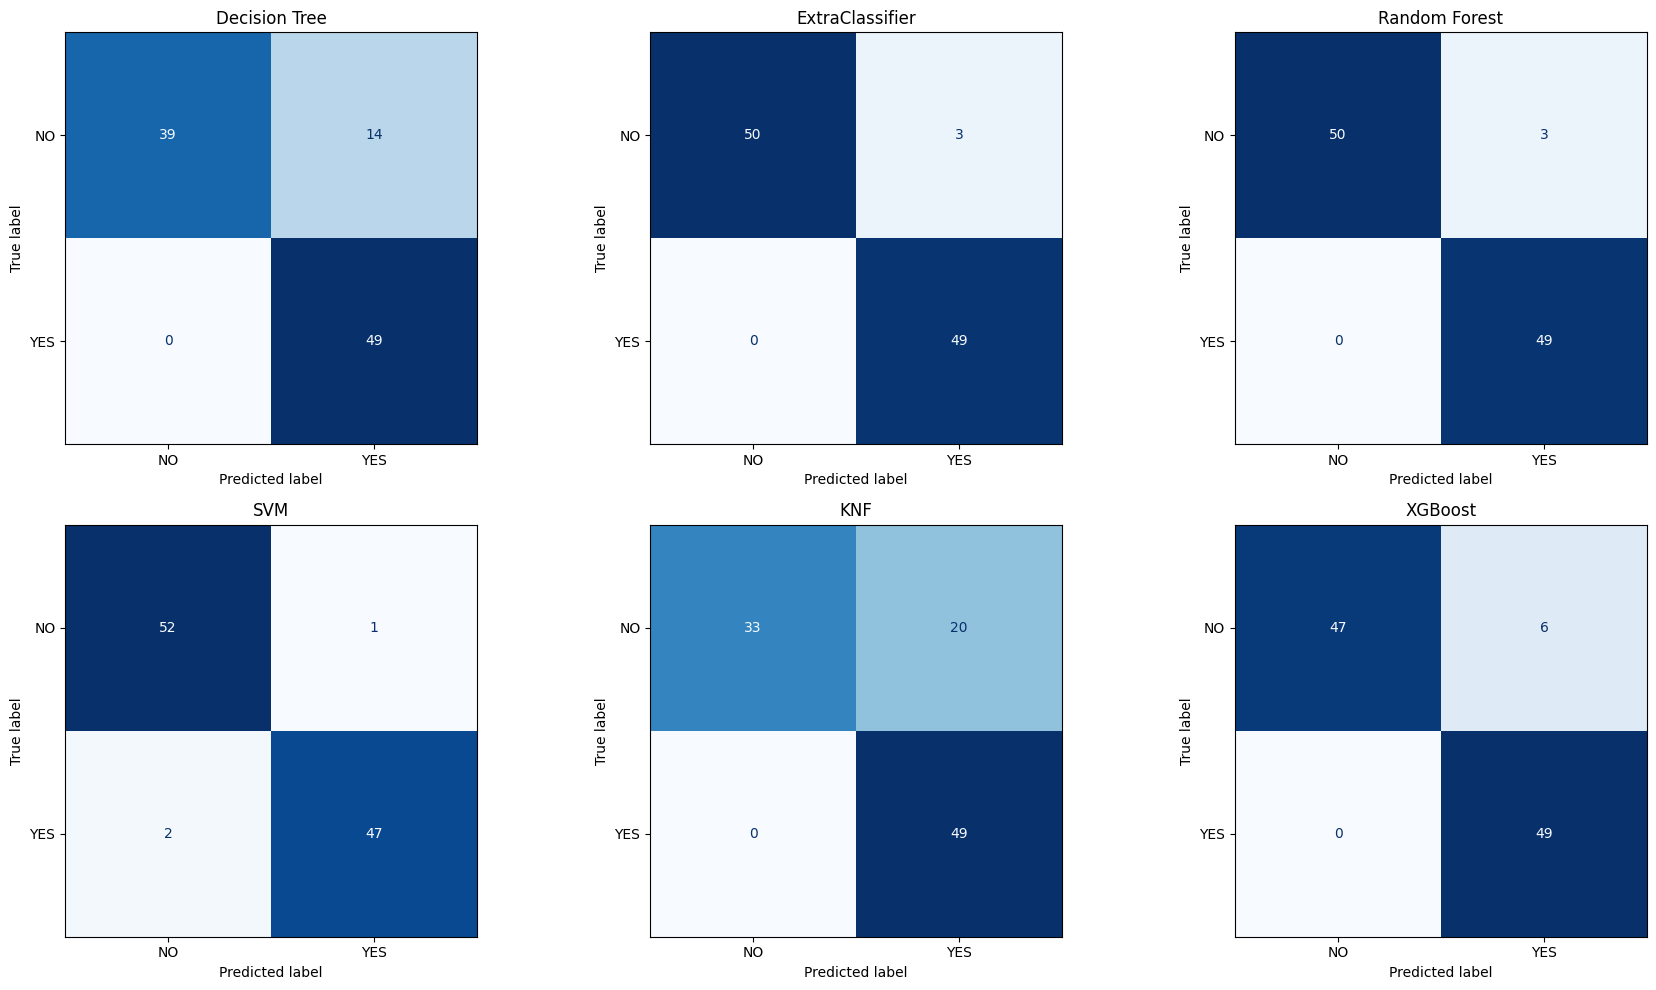

In [169]:
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(figsize=(18,10))
for i, (name, pipe) in enumerate(best_models.items(), 1):
    ax = plt.subplot(2, 3, i)
    ConfusionMatrixDisplay.from_estimator(pipe, x_test, y_test_enc,
                                          display_labels=['NO','YES'],
                                          cmap='Blues', colorbar=False, ax=ax)
    ax.set_title(name)
plt.tight_layout()
plt.show()


In [172]:
pd.DataFrame(roc_data)

,Decision Tree,ExtraClassifier,Random Forest,SVM,KNF,XGBoost
0,"[0.0, 0.2641509433962264, 1.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.1320754716981132, 0.5849056603773585, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"[0.0, 1.0, 1.0]","[0.0, 0.1836734693877551, 0.22448979591836735,...","[0.0, 0.04081632653061224, 0.06122448979591836...","[0.0, 0.04081632653061224, 0.16326530612244897...","[0.0, 1.0, 1.0, 1.0]","[0.0, 0.02040816326530612, 0.06122448979591836..."
2,0.867925,1.0,1.0,0.998075,0.933962,0.991144


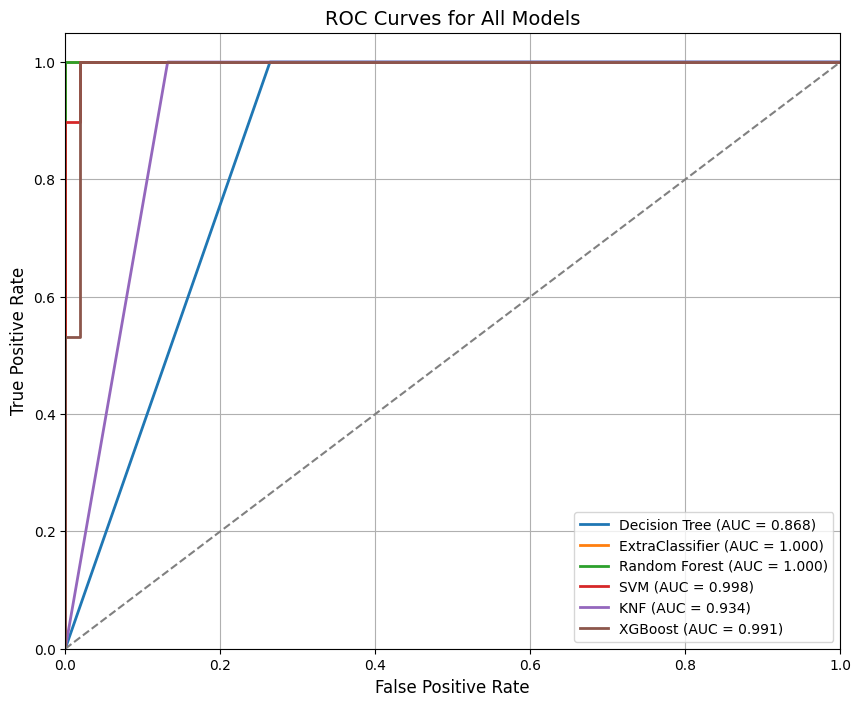

In [170]:
plt.figure(figsize=(10, 8))

for name, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0,1], [0,1], color='gray', linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves for All Models', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [174]:
import pandas as pd
import matplotlib.pyplot as plt

importances = svm_pipeline.feature_importances_
features = x_train.columns 

feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
feat_imp.plot(kind='bar',colormap ='viridis')
plt.title("Feature Importance - ExtraTrees")
plt.show()

AttributeError: 'Pipeline' object has no attribute 'feature_importances_'

In [175]:
from sklearn.inspection import permutation_importance

r = permutation_importance(
    svm_pipeline,
    x_test,
    y_test_enc,
    scoring='accuracy',
    n_repeats=10,
    random_state=42
)

feature_names = svm_pipeline.named_steps['preprocessing'].get_feature_names_out()
feat_imp = pd.Series(r.importances_mean, index=feature_names).sort_values(ascending=False)

feat_imp.head(10)


AttributeError: 'SVC' object has no attribute 'classes_'